In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
import nltk
from nltk.util import pr
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
stemmer = nltk.SnowballStemmer("english")
nltk.download('stopwords')
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import os
print(os.getcwd())
print(os.listdir())

E:\DataScience\jupyter
['.ipynb_checkpoints', 'Ukrine Russia War.ipynb', 'war_tweets.xlsx']


In [ ]:
data = pd.read_excel("war_tweets.xlsx")

In [ ]:
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1504330000000000000,1504080000000000000,2022-03-17 05:15:51 UTC,17/3/2022,05:15:51,0,1016938400,bowtiedbeyonce,Michael John,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'PeterSchiff', 'name': 'Peter...",NaN,NaN,NaN,NaN
1,1504330000000000000,1504320000000000000,2022-03-17 05:15:51 UTC,17/3/2022,05:15:51,0,1420230000000000000,theshydoomer,THE SHY DOOMER ðŸ‡ºðŸ‡¦,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'meatballsubzero', 'name': 'Ñ...",NaN,NaN,NaN,NaN
2,1504330000000000000,1504330000000000000,2022-03-17 05:15:51 UTC,17/3/2022,05:15:51,0,1387730000000000000,rosaort91373426,Rosa Ortiz,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1504330000000000000,1504330000000000000,2022-03-17 05:15:50 UTC,17/3/2022,05:15:50,0,54210082,woodsallan,Allan Woods,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1504330000000000000,1504320000000000000,2022-03-17 05:15:50 UTC,17/3/2022,05:15:50,0,64328392,artemistweet,Artemis,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'BW', 'name': 'Businessweek',...",NaN,NaN,NaN,NaN


In [ ]:
data.tail()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
10010,1504310000000000000,1504310000000000000,2022-03-17 04:06:24 UTC,17/3/2022,04:06:24,0,1504310000000000000,sammynicoet,Jesse Jo,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
10011,1504310000000000000,1486860000000000000,2022-03-17 04:06:24 UTC,17/3/2022,04:06:24,0,1470940000000000000,sabrina15647051,Sabrina Schroeder,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'ACMillerAuthor', 'name': 'A....",NaN,NaN,NaN,NaN
10012,1504310000000000000,1504290000000000000,2022-03-17 04:06:24 UTC,17/3/2022,04:06:24,0,1239370000000000000,wow33396307,ì•„ë¹,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'ua_industrial', 'name': 'ÐŸÑ...",NaN,NaN,NaN,NaN
10013,1504310000000000000,1504110000000000000,2022-03-17 04:06:23 UTC,17/3/2022,04:06:23,0,1464510000000000000,piotrtrebisz,Piotr Trebisz ðŸŒ» ðŸ‡ºðŸ‡¦ ðŸ‡ºðŸ‡¦ ðŸ‡ºðŸ‡¦ ...,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'therudraAU', 'name': 'Rudra ...",NaN,NaN,NaN,NaN
10014,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest


In [ ]:
data.shape

(10015, 36)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               10015 non-null  object
 1   conversation_id  10015 non-null  object
 2   created_at       10015 non-null  object
 3   date             10015 non-null  object
 4   time             10015 non-null  object
 5   timezone         10015 non-null  object
 6   user_id          10015 non-null  object
 7   username         10015 non-null  object
 8   name             10015 non-null  object
 9   place            2 non-null      object
 10  tweet            10015 non-null  object
 11  language         10015 non-null  object
 12  mentions         10015 non-null  object
 13  urls             10015 non-null  object
 14  photos           10015 non-null  object
 15  replies_count    10015 non-null  object
 16  retweets_counts  10015 non-null  object
 17  likes_count      10015 non-null

In [ ]:
data.describe()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
count,10015,10015,10015,10015,10015,10015,10015,10015,10015,2,...,1,1,1,1,1,10015,1,1,1,1
unique,4,304,3791,2,3791,2,7491,7715,7614,2,...,1,1,1,1,1,3820,1,1,1,1
top,1504320000000000000,1504320000000000000,2022-03-17 05:00:00 UTC,17/3/2022,05:00:00,0,1501990000000000000,playingaroundw,playingaround_web@yahoo.com,"{'type': 'Point', 'coordinates': [37.54274326,...",...,geo,source,user_rt_id,user_rt,retweet_id,[],retweet_date,translate,trans_src,trans_dest
freq,5620,2803,15,10014,15,10014,54,52,52,1,...,1,1,1,1,1,4604,1,1,1,1


In [ ]:
data.isnull().sum()

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   0
place              10013
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_counts        0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url           9138
video                  0
thumbnail           9078
near               10014
geo                10014
source             10014
user_rt_id         10014
user_rt            10014
retweet_id         10014
reply_to               0
retweet_date       10014
translate          10014
trans_src          10014
trans_dest         10014
dtype: int64

In [ ]:
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_counts', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [ ]:
data[["tweet"]].head()

,tweet
0,@PeterSchiff @PadaPrabu @SteveKrohn1 If it wer...
1,@meatballsubzero Are you pro russia or pro Ukr...
2,@SUBWAY Please stop doing business in Russia. ...
3,Is Russia prepared for an economic crisis? Dev...
4,@BW Putin is Fake News ðŸ“° The Ruble is trash...


In [ ]:
data["language"].value_counts()

en          9018
pt           211
und          158
it           118
hi            80
in            79
ru            69
ja            54
es            22
pl            19
tl            18
nl            15
de            14
fr            13
ar            13
zh            11
th            10
ca             9
ta             8
et             6
ro             6
bn             5
mr             5
or             5
fi             5
ne             5
uk             4
cs             4
ml             4
kn             4
ur             3
te             3
gu             3
no             3
el             3
iw             2
tr             2
fa             1
am             1
language       1
sl             1
Name: language, dtype: int64

<AxesSubplot:ylabel='language'>

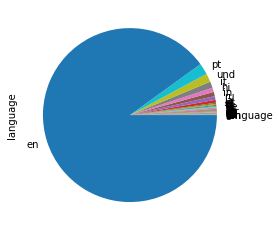

In [ ]:
data.language.value_counts().sort_values().plot(kind = 'pie')

<AxesSubplot:>

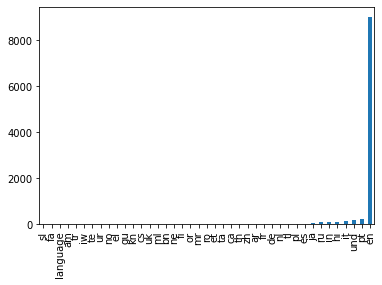

In [ ]:
data.language.value_counts().sort_values().plot(kind = 'bar')

In [ ]:
data["tweet"][0]

'@PeterSchiff @PadaPrabu @SteveKrohn1 If it were you you would have shit your pants and changed the name of your country to Russia.'

In [ ]:
import seaborn as sns
def hashtag_extract(text_list):
    hashtags = []
    # Loop over the words in the tweet
    for text in text_list:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)
    return hashtags
def generate_hashtag_freqdist(hashtags):
    a = nltk.FreqDist(hashtags)
    d = pd.DataFrame({'Hashtag': list(a.keys()),
                      'Count': list(a.values())})
        # selecting top 15 most frequent hashtags
    d = d.nlargest(columns="Count", n = 25)
    plt.figure(figsize=(16,7))
    ax =sns.barplot(data=d, x= "Hashtag", y = "Count")
    plt.xticks(rotation=80)
    ax.set(ylabel='Count')
    plt.show()

In [ ]:
hashtags = hashtag_extract(data["tweet"])
hashtags = sum(hashtags, [])

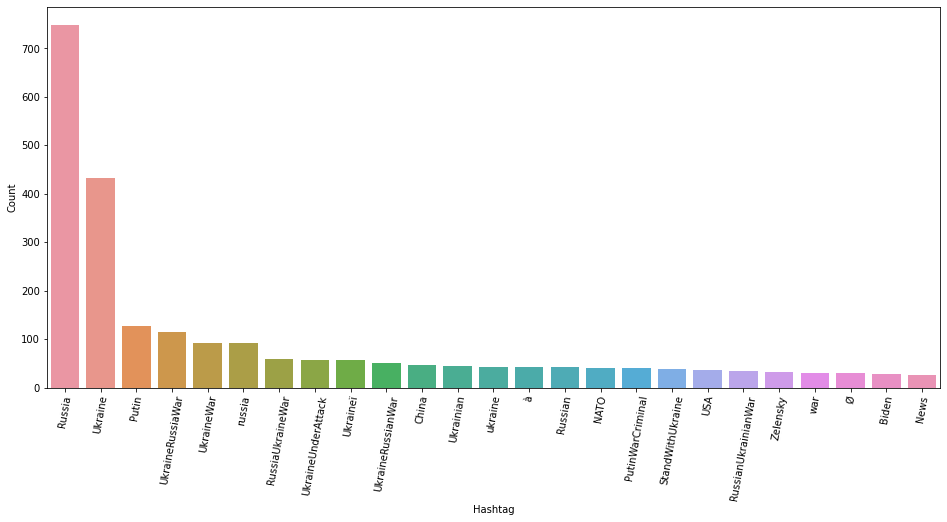

In [ ]:
generate_hashtag_freqdist(hashtags)

In [ ]:
data['total_length_characters'] = data['tweet'].str.len()
print(data['total_length_characters'])
total_length_characters = data['total_length_characters'].sum()
print(total_length_characters)
count = 0
for y in data["tweet"]:
    count = count + 1
print(count)
average_length = total_length_characters / count
print (average_length)

0        130
1        162
2        166
3        219
4         80
        ... 
10010     84
10011    176
10012    248
10013    216
10014      5
Name: total_length_characters, Length: 10015, dtype: int64
1800025
10015
179.73290064902645


In [ ]:
data['total_count_words'] = data['tweet'].str.split().str.len()
print(data['total_count_words'])
total_words = data['total_count_words'].sum()
print(total_words)
count = 0
for y in data["tweet"]:
    count = count + 1
print(count)
average_words = total_words / count
print (average_words)

0        22
1        28
2        26
3        32
4        15
         ..
10010    11
10011    32
10012    39
10013    32
10014     1
Name: total_count_words, Length: 10015, dtype: int64
271704
10015
27.129705441837245


In [ ]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

In [ ]:
data['total_length_characters'] = data['tweet'].str.len()
print(data['total_length_characters'])
total_length_characters = data['total_length_characters'].sum()
print(total_length_characters)
count = 0
for y in data["tweet"]:
    count = count + 1
print(count)
average_length = total_length_characters / count
print (average_length)

0         64
1         98
2        120
3        133
4         62
        ... 
10010     74
10011    115
10012    129
10013    137
10014      5
Name: total_length_characters, Length: 10015, dtype: int64
1142676
10015
114.09645531702446


In [ ]:
data['total_count_words'] = data['tweet'].str.split().str.len()
print(data['total_count_words'])
total_words = data['total_count_words'].sum()
print(total_words)
count = 0
for y in data["tweet"]:
    count = count + 1
print(count)
average_words = total_words / count
print (average_words)

0         9
1        16
2        19
3        19
4        11
         ..
10010    10
10011    19
10012    20
10013    18
10014     1
Name: total_count_words, Length: 10015, dtype: int64
163755
10015
16.350973539690465


In [ ]:
! pip install textblob

     -------------------------------------- 636.8/636.8 KB 1.6 MB/s eta 0:00:00


In [ ]:
from textblob import TextBlob

In [ ]:
def analyze_sentiment(tweet):
    analysis = TextBlob(clean(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [ ]:
data['Sentiment'] = data['tweet'].apply(lambda x:analyze_sentiment(x))
data['Source'] = 'random_user'
data['Length'] = data['tweet'].apply(len)
data['Word_counts'] = data['tweet'].apply(lambda x:len(str(x).split()))

In [ ]:
data1=data[['tweet','Sentiment', 'Source','Length','Word_counts']]
data1.head()

,tweet,Sentiment,Source,Length,Word_counts
0,peterschiff padaprabu would shit pant chang n...,-1,random_user,64,9
1,meatballsubzero pro russia pro ukrain cannot ...,0,random_user,98,16
2,subway pleas stop busi russia everi dollar spe...,1,random_user,120,19
3,russia prepar econom crisi develop expert nata...,0,random_user,133,19
4,bw putin fake news ðÿ“° rubl trash ðÿ— russia ...,-1,random_user,62,11


In [ ]:
data1['Clean tweet'] = data1['tweet'].apply(lambda x:clean(x))

In [ ]:
data1[["Clean tweet","Sentiment"]].iloc[100]

Clean tweet    ewarren war russia putin peopl wef go peopl la...
Sentiment                                                      0
Name: 100, dtype: object

In [ ]:
sentiment = data1['Sentiment'].value_counts()
sentiment


 0    5095
 1    2788
-1    2132
Name: Sentiment, dtype: int64

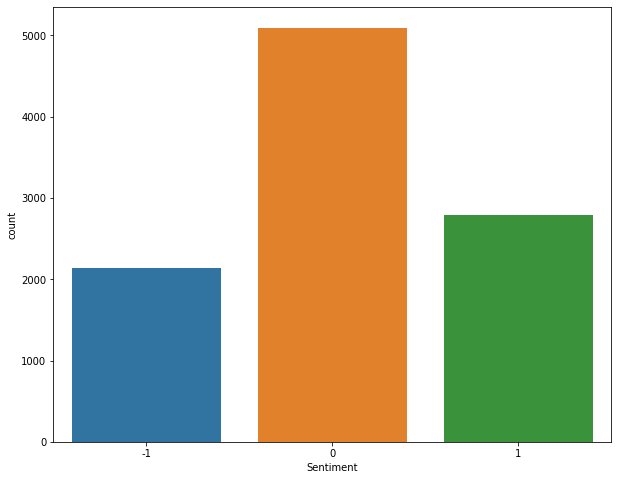

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(data = data1, x = 'Sentiment')
plt.show()


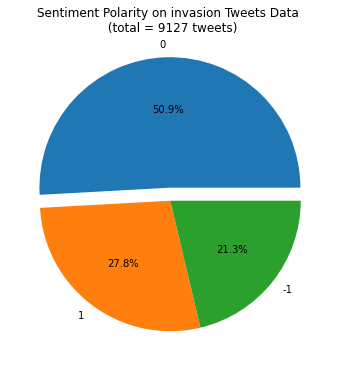

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in data1['Sentiment'].value_counts()]
labels = list(data['Sentiment'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode)
#textprops={'f ax.set_title('Sentiment Polarity on invasion Tweets Data \n (total = 9127 tweets)')}
ax.set_title('Sentiment Polarity on invasion Tweets Data \n (total = 9127 tweets)')
#font
plt.show()

In [ ]:
neutral = data1[data1['Sentiment'] == 0]
positive = data1[data1['Sentiment'] == 1]
negative = data1[data1['Sentiment'] == -1]

In [ ]:
negative.iloc[1]

tweet          bw putin fake news ðÿ“° rubl trash ðÿ— russia ...
Sentiment                                                     -1
Source                                               random_user
Length                                                        62
Word_counts                                                   11
Clean tweet    bw putin fake news ðÿ“° rubl trash ðÿ— russia ...
Name: 4, dtype: object

In [ ]:
#neutral_text
print("Neutral tweet example :",neutral['tweet'].values[15])
# Positive tweet
print("Positive Tweet example :",positive['tweet'].values[37])
#negative_text
print("Negative Tweet example :",negative['tweet'].values[1])


Neutral tweet example : us allow russia troop cuba mexico attack said countri
Positive Tweet example : new post media israeliani russia aperta idea di negoziati gerusalemm â€“  
Negative Tweet example : bw putin fake news ðÿ“° rubl trash ðÿ— russia histori ðÿ'‹ðÿ½


In [ ]:
! pip install wordcloud

     -------------------------------------- 154.6/154.6 KB 1.6 MB/s eta 0:00:00


In [ ]:
from wordcloud import WordCloud


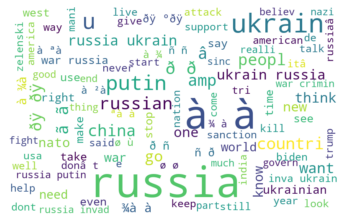

In [ ]:
txt = ' '.join(text for text in data1['Clean tweet'])
wordcloud = WordCloud(
    background_color = 'white',
    max_font_size = 100,
    max_words = 100,
    width = 800,
    height = 500
    ).generate(txt)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()


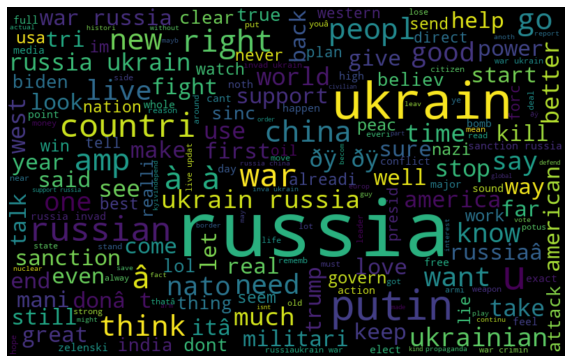

In [ ]:
positive_words =' '.join([text for text in data1['Clean tweet'][data1['Sentiment'] == 1]])
wordcloud = WordCloud(
    width=800,
    height=500,
    random_state=21,
    max_font_size=110
    ).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


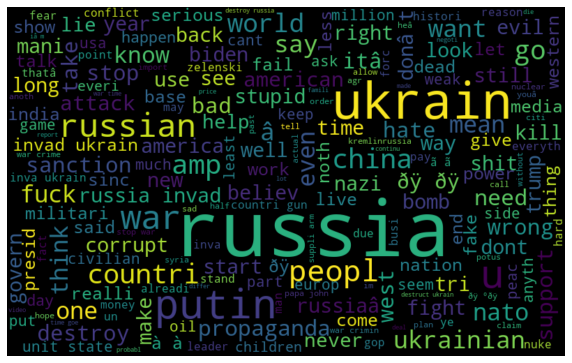

In [ ]:
negative_words =' '.join([text for text in data1['Clean tweet'][data1['Sentiment'] == -1]])
wordcloud = WordCloud(
    width=800,
    height=500,
    random_state=21,
    max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


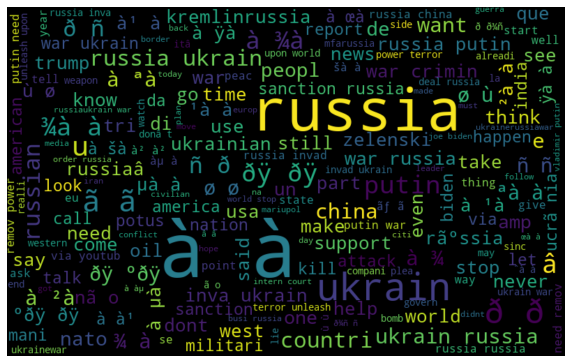

In [ ]:
neutral_words =' '.join([text for text in data1['Clean tweet'][data1['Sentiment'] == 0]])
wordcloud = WordCloud(
    width=800,
    height=500,
    random_state=21,
    max_font_size=110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
